In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne
reload(kid_readout.roach.heterodyne)

<module 'kid_readout.roach.heterodyne' from '/home/gjones/kid_readout/kid_readout/roach/heterodyne.pyc'>

In [3]:
import kid_readout.utils.sweeps

In [4]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [27]:
ri.set_fft_gain(4)

In [6]:
ri.set_lo(1330.)

In [175]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-128,128)+1330.25,offsets=np.arange(-16,16)/32.,nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [165]:
ri.set_modulation_output(4)

976.5625

In [176]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

detected mcnt overflow None 360771 0 65536 0 512 360771
detected mcnt overflow None 688473 0 65536 0 560 688473


In [177]:
swp.freqs.shape

(8192,)

In [232]:
dblk = np.zeros((swp.freqs.shape[0],8192),dtype=blk.data.dtype)

In [233]:
for k in range(swp.freqs.shape[0]):
    if k % 16 ==8:
        continue
    dblk[k,:] = swp.blocks[k].data[:]

In [234]:
dblk = dblk.reshape((dblk.shape[0],-1,32))

In [141]:
dblk.shape

(4096, 64, 128)

In [235]:
dm = np.abs(dblk).mean(1)
dm = dm - dm.mean(1)[:,None]

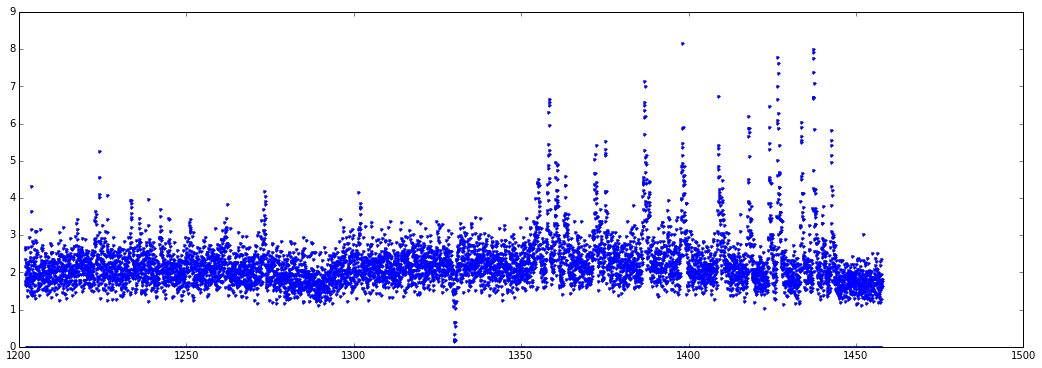

In [238]:
figure(figsize=(18,6))
plot(swp.freqs,dm.ptp(1),'.')
#ylim(0,5)

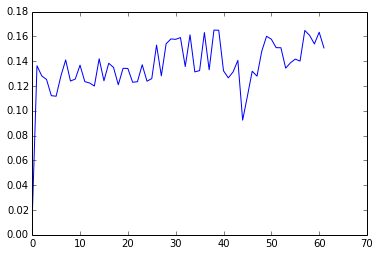

In [231]:
plot(np.abs(swp.data[8:1000:16]))

(1200, 1220)

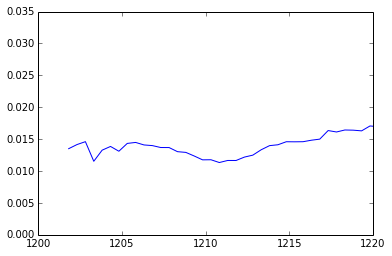

In [219]:
plot(swp.freqs[2::16],np.abs(swp.data[15::16]))
xlim(1200,1220)

In [187]:
(dm.ptp(1)>5).sum()

159

In [172]:

plot(np.abs(dm[:,40]-dm[:,100]))

IndexError: index 40 is out of bounds for axis 1 with size 32

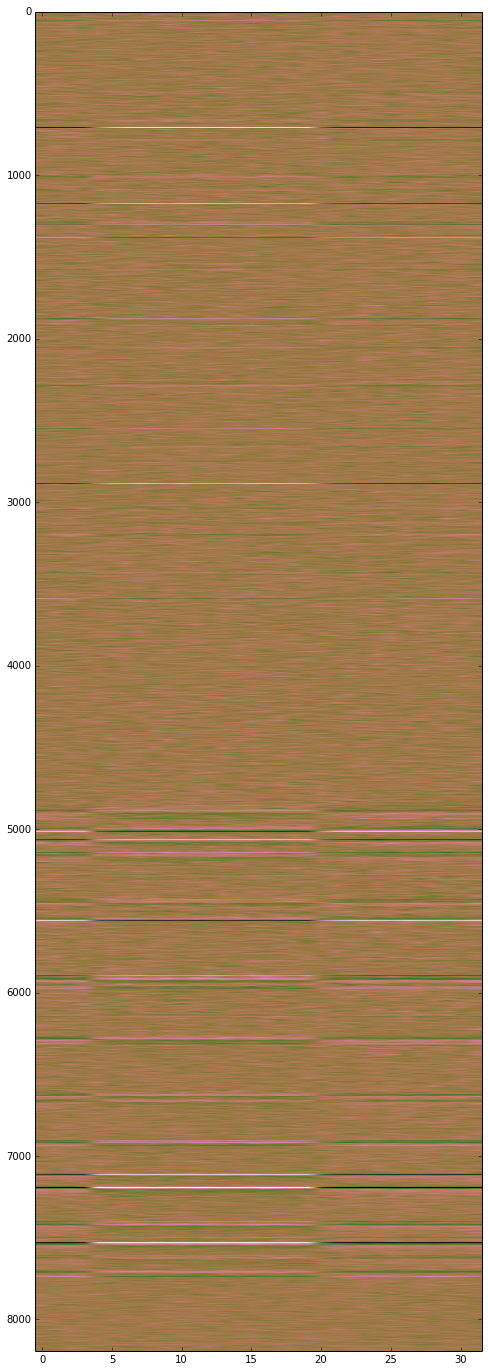

In [182]:
figure(figsize=(8,24))
imshow(dm,aspect='auto',cmap=cm.cubehelix)
clim(-10,10)

In [129]:
blk = swp.blocks[2700]

In [130]:
blk.tone*blk.fs/blk.nsamp+1330

1354.84375

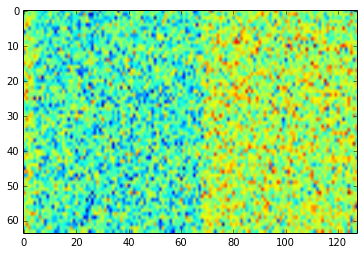

In [134]:
imshow(blk.data.imag.reshape((-1,128)),aspect='auto')

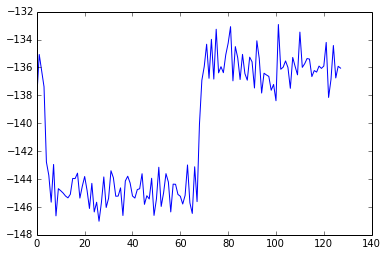

In [137]:
plot(blk.data.imag.reshape((-1,128)).mean(0))
#plot(blk.data.real.reshape((-1,128)).mean(0))


In [111]:
ri.set_dac_atten(10)

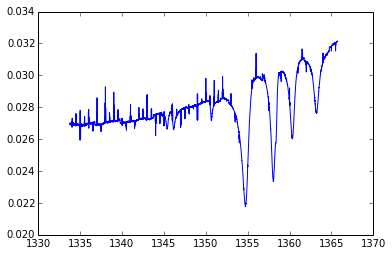

In [113]:
plot(swp.freqs,np.abs(swp.data))

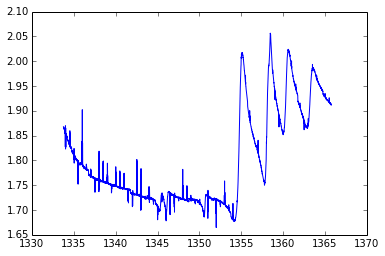

In [116]:
plot(swp.freqs,np.angle(swp.data*np.exp(-2j*np.pi*31.3*swp.freqs)))

In [63]:
ri.select_bank(2)

In [64]:
ri.select_fft_bins(range(32))

In [65]:
d, addr = ri.get_data(4)

In [66]:
d.shape

(16384, 32)

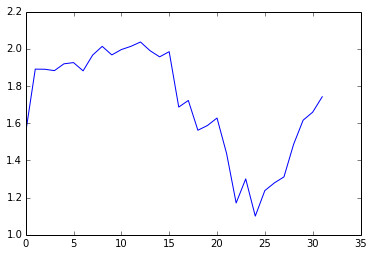

In [67]:
plot(np.log10(np.abs(d).mean(0)))

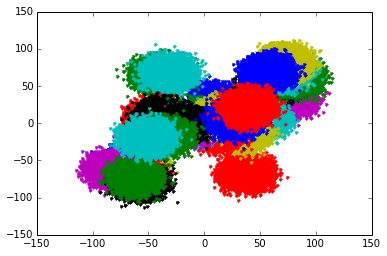

In [68]:
blah = plot(d.real,d.imag,'.')

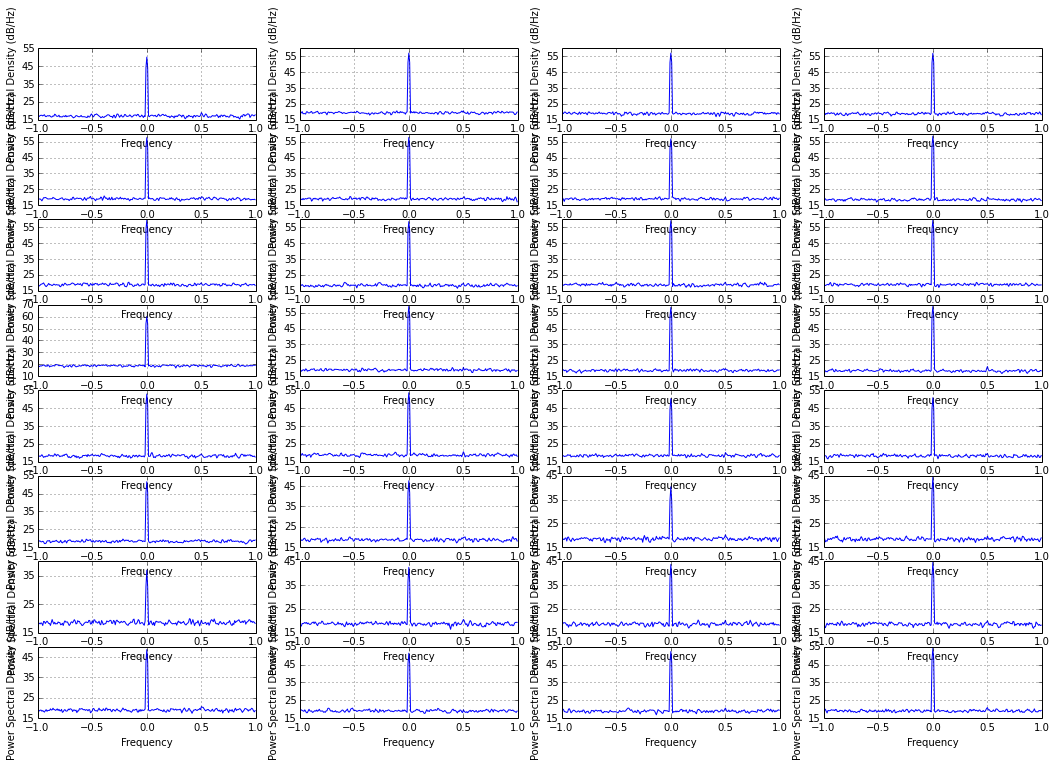

In [69]:
fig,axs = subplots(8,4,figsize=(18,12))
for k in range(32):
    ax = axs.flatten()[k]
    ax.psd(d[:,k])

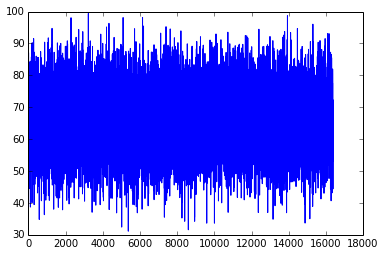

In [70]:
plot(d[:,1].imag)

In [74]:
x,y = ri.get_raw_adc()

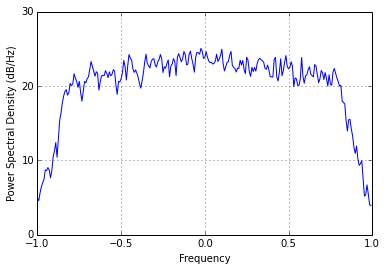

In [75]:
blah = psd(x+1j*y)

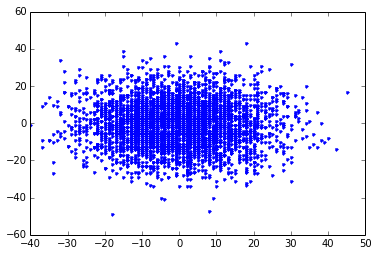

In [77]:
plot(x,y,'.')

In [73]:
ri.set_dac_atten(63)